<a href="https://colab.research.google.com/github/ZiyueNie/19ma573ZiyueNie/blob/master/src/HW4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ZiyueNie/19ma573ZiyueNie

Cloning into '19ma573ZiyueNie'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 290 (delta 51), reused 0 (delta 0), pack-reused 155
Receiving objects: 100% (290/290), 424.07 KiB | 15.71 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [2]:
cd 19ma573ZiyueNie/src/

/content/19ma573ZiyueNie/src


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy.optimize as so
from contract_v01 import VanillaOption
#from test002 import VanillaOption
from sde_1d_v01 import Sde_1d, Gbm_1d


In [4]:
'''==============
Test BSM geometric asian option price
==============='''
gbm1 = Gbm_1d(init_state=100., drift_ratio=0.0475, vol_ratio=.2)
gao1 = gbm1.bsm_geometric_asian_price(otype = 1,strike = 110.,maturity=1,num_step=4)
print('>>>>>> geometric call option value is ' + str(gao1))

>>>>>> geometric call option value is 1.607164727431734


In [0]:
'''===============
market available data
=================='''
#paras for stock price
spot = 100
rate = .05
#paras for geometric asian options
otype = 1
maturity = 2/12
num_step = 8
strike_list = [97, 99, 101, 103]
market_price_list = [
3.7925736094875964,
2.5429985313737244,
1.6026613800895042,
0.9366198675047346]

In [6]:

'''================
calibrated volatility based on vanilla options
=================='''
calibarated_vol = 0.18109375000000028
calibrated_price=[]
gbm1 = Gbm_1d(init_state=spot, drift_ratio=rate, vol_ratio=calibarated_vol)
for i in range(len(strike_list)):
  calibrated_price.append(gbm1.bsm_geometric_asian_price(otype=1, strike=strike_list[i],maturity=maturity, num_step=num_step))
print('>>>>>>>>> calibrated price are:\n ')
for a in calibrated_price:
  print(a)
#calibrated_price

>>>>>>>>> calibrated price are:
 
3.807571582023542
2.4020600269716677
1.3571851322662047
0.6779174887750915


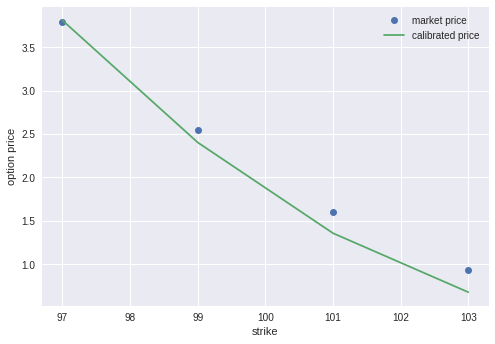

In [7]:
#compare market price and calibrated price in terms of strike
x_co = strike_list
y_co = market_price_list
plt.plot(x_co, y_co,'o', label='market price')
y_co = calibrated_price
plt.plot(x_co, y_co, label='calibrated price')

plt.ylabel('option price')
plt.xlabel('strike')
plt.legend()
plt.show()